In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Helper Functions

#### read fithichip peaks files

In [2]:
def read_fithichip_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:4]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

#### read fithichip loops files

In [3]:
def read_fithichip_loop_files(file):
    loop_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                loop_info = info[0:6]
                loop_data[count] = loop_info
                count = count + 1
    return(loop_data)

#### read hicpro stats logs

In [4]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate pandas dataframe 

In [11]:
def generate_df(base_path, sample_name_index):
    data = []
    tpl = base_path
    glob_str = tpl.format(sample_name='*')
    loops_files = []
    for dirpath, dirs, files in os.walk('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/fithichip/'): 
          for filename in files:
                fname = os.path.join(dirpath,filename)
                if fname.endswith('.interactions_FitHiC_Q0.01.bed'):
                      loops_files.append(fname)
    for fn in glob.glob(glob_str):
        sample_name = fn.split('/')[sample_name_index]
        if sample_name != "washu":
            sample_info = []
            loops_files = []
            file_path_peaks = "/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/fithichip/" + sample_name + "/MACS2_ExtSize/out_macs2_peaks.narrowPeak"
            file_path_mpairstat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + ".mpairstat"
            file_path_mergestat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + "_allValidPairs.mergestat"
            sample_info.append(sample_name)
            
            ## HICPRO
            
            if os.path.exists(file_path_mpairstat):
                pairs_info = read_hicpro_stats_log(file_path_mpairstat)
                sample_info.append(int(pairs_info[0][1]))
            else:
                sample_info.append(int(0))
            if os.path.exists(file_path_mergestat):
                pairs_info = read_hicpro_stats_log(file_path_mergestat)
                sample_info.append(int(pairs_info[0][1]))
            else:
                sample_info.append(int(0))
                
            ## PEAKS
            
            if os.path.exists(file_path_peaks):
                peak_info = read_fithichip_peak_files(file_path_peaks)
                sample_info.append(len(peak_info))
                peak_sizes = []
                for peak in peak_info.items():
                    peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
                sample_info.append(np.mean(peak_sizes))
            else:
                sample_info.append(int(0))
                
            ## LOOPS
            
            L5_path = os.path.join(fn,"L5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_L5.interactions_FitHiC_Q0.01.bed")
            S5_path = os.path.join(fn,"S5/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_S5.interactions_FitHiC_Q0.01.bed")
            L10_path = os.path.join(fn,"L10/FitHiChIP_Peak2ALL_b10000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_L10.interactions_FitHiC_Q0.01.bed")
            S10_path = os.path.join(fn,"S10/FitHiChIP_Peak2ALL_b10000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_S10.interactions_FitHiC_Q0.01.bed")
            L25_path = os.path.join(fn,"L25/FitHiChIP_Peak2ALL_b25000_L20000_U2000000/P2PBckgr_0/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_L25.interactions_FitHiC_Q0.01.bed")
            S25_path = os.path.join(fn,"S25/FitHiChIP_Peak2ALL_b25000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/FitHiChIP_S25.interactions_FitHiC_Q0.01.bed")
            
            if os.path.exists(L5_path) and os.stat(L5_path).st_size != 0:
                loop_info = read_fithichip_loop_files(L5_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            if os.path.exists(S5_path) and os.stat(S5_path).st_size != 0:
                loop_info = read_fithichip_loop_files(S5_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            if os.path.exists(L10_path) and os.stat(L10_path).st_size != 0:
                loop_info = read_fithichip_loop_files(L10_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            if os.path.exists(S10_path) and os.stat(S10_path).st_size != 0:
                loop_info = read_fithichip_loop_files(S10_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            if os.path.exists(L25_path) and os.stat(L25_path).st_size != 0:
                loop_info = read_fithichip_loop_files(L25_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            if os.path.exists(S25_path) and os.stat(S25_path).st_size != 0:
                loop_info = read_fithichip_loop_files(S25_path)
                sample_info.append(len(loop_info) - 1)
            else:
                sample_info.append(int(0))
            data.append(sample_info)
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [12]:
df = generate_df('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/loops/fithichip/{sample_name}/', 10)
df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of HiChIP Peaks (fithichip)","Average Peak Size", "Peak2ALL b5000 P2PBckgr_0 Q0.01", "Peak2ALL b5000 P2PBckgr_1 Q0.01", "Peak2ALL b10000 P2PBckgr_0 Q0.01", "Peak2ALL b10000 P2PBckgr_1 Q0.01", "Peak2ALL b25000 P2PBckgr_0 Q0.01", "Peak2ALL b25000 P2PBckgr_1 Q0.01"]

#### sort by number of hichip peaks (fithichip)

In [13]:
df = df.sort_values(by=["Peak2ALL b5000 P2PBckgr_0 Q0.01"], ascending=False).reset_index(drop=True)
df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of HiChIP Peaks (fithichip),Average Peak Size,Peak2ALL b5000 P2PBckgr_0 Q0.01,Peak2ALL b5000 P2PBckgr_1 Q0.01,Peak2ALL b10000 P2PBckgr_0 Q0.01,Peak2ALL b10000 P2PBckgr_1 Q0.01,Peak2ALL b25000 P2PBckgr_0 Q0.01,Peak2ALL b25000 P2PBckgr_1 Q0.01
1,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27a...,630181138,380199595,102026,493.873473,690184,107774,775410,0,0,0
2,HaCaT_Unstimulated.GSE151193.Homo_Sapiens.H3K2...,574505628,347303698,79502,515.693907,550053,76338,632635,120427,522524,0
3,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,211864,526.174546,474382,230394,505402,279586,399709,293183
4,HCASMC.GSE101498.Homo_Sapiens.H3K27ac.b1,722202094,234954564,175955,465.458231,469788,122791,540128,178062,432292,169874
5,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,105984,436.866018,395050,79150,460560,123828,383185,144544
6,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,162519,482.570666,315110,139883,368991,193854,335826,236710
7,HAEC.GSE178598.Homo_Sapiens.H3K27ac.b1,334543061,186439092,79616,534.369386,313079,50340,380804,79288,350496,102294
8,GM.GSE101498.Homo_Sapiens.H3K27ac.b1,332279257,104375182,144759,395.425265,283888,65194,335015,89211,283374,98166
9,Naive_Tcells.GSE101498.Homo_Sapiens.H3K27ac.b3,220425415,118853962,62833,410.555711,274807,40361,311393,57225,277042,65219
10,GM.GSE101498.Homo_Sapiens.H3K27ac.b2,299478736,97800990,130144,391.274542,266762,57715,313918,79561,269181,89367


count        66.000000
mean      51188.727273
std       51492.392165
min         823.000000
25%       12154.000000
50%       32939.500000
75%       72440.250000
max      211864.000000
Name: Number of HiChIP Peaks (fithichip), dtype: float64

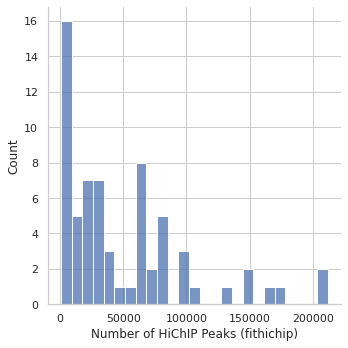

In [8]:
sns.displot(df, bins=25, x="Number of HiChIP Peaks (fithichip)")
df["Number of HiChIP Peaks (fithichip)"].describe()

count     66.000000
mean     348.153053
std      110.089686
min      174.290963
25%      252.733271
50%      336.029187
75%      435.412214
max      592.926123
Name: Average Peak Size, dtype: float64

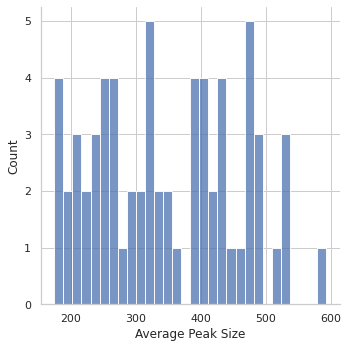

In [9]:
sns.displot(df, bins=30, x="Average Peak Size")
df["Average Peak Size"].describe()